# UAS KECERDASAN BUATAN

### Nama : Alifah Fidela
### Nim : 09011281823039
### Kelas : SK5B
    

Pada program ini digunakan metode Support Vector Machine(SVM)yang merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi dan regresi. SVM dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non liniear.SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. Hyperplane adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas.

Digunakan SVM untuk mengklasifikasikan bunga iris. Pada dataset yang digunakan terdapat beberapa jenis dari bunga iris yaitu iris sentosa, iris versicolor dan iris virginica. Digunakan 50 sample pada masing masing jenisnya. 

Fitur yang digunakan yaitu :
- SepalLength
- SepalWidth
- PetalLength
- PetalWidth

Digunakan dalam centimeter, masing masing jenis iris memiliki SepalLength,SepalWidth,PetalLength dan PetalWidth yang berbeda-beda. 

Referensi dari https://www.kaggle.com/dhruvkalia/svm-linear-classification

### Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

### Import Dataset

In [2]:
df = pd.read_csv("E:/SEMESTER 5/UAS/Svm-Linear-Classification/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data yang ditampilkan diatas terdapat beberapa baris dan kolom. Pada baris pertama terdapat beberapa variabel diantaranya fitur data yang digunakan yaitu SepalLength,SepalWidth,PetalLength dan PetalWidth dan juga terdapat variabel spesies.

### Visualisasi Data

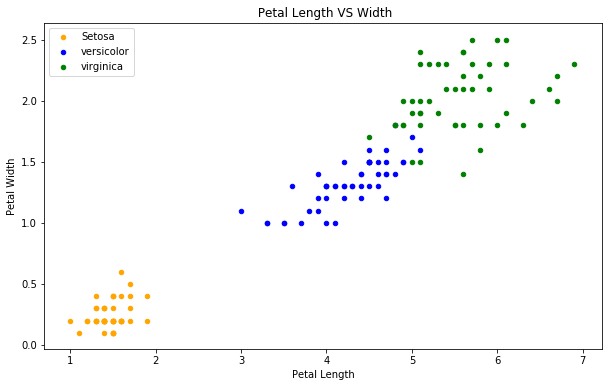

In [4]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Selanjutnya yaitu visualisasai data :
- xlabel menjadi Petal Length 
- ylabel menjadi Petal Width
- title menjadi Petal Length vs Width

Kemudian juga di definisikan 3 jenis dari bunga iris yang ditampilkan pada plot diatas, yang sudah terkelompok seperti warna biru yaitu iris versicolor, warna hijau yaitu iris virginica dan warna orange yaitu iris setosa. 

### Variabel Dependen dan Independen

In [5]:
X = df.iloc[:,[3,4]]
y = df.iloc[:, [5]]
X.columns

Index(['PetalLengthCm', 'PetalWidthCm'], dtype='object')

Proses diatas yaitu memisahkan variabel dependen dan independen.
- variabel dependen yaitu x
- variabel independen yaitu y

Digunakan operasi slicing untuk membagi data dari dalam objek DataFrame.Data yang diambil sebagai array bukan objek DataFrame. Fungsi .iloc digunakan untuk pengindeksan berbasis lokasi untuk pemilihan berdasarkan posisi.

### Label Encoding

In [6]:
labelled_y = y.copy()
label_encoder = LabelEncoder()
for col in y.columns:
    labelled_y[col] = label_encoder.fit_transform(y[col])

### Training and Testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, labelled_y, test_size=0.2, random_state=42)

pada perintah diatas yaitu akan membagi data yang akan di train dan di test. Train yaitu dataset yang dilatih yang akan digunakan untuk membuat prediksi. Sedangkan test yaitu dataset yang akan diuji untuk melihat hasil akurasi.

definisi yang ada pada fungsi diatas :
- x_train yaitu data x yang akan dilatih
- x_test yaitu data x yang akan di uji
- y_train yaitu variabel dependen yang akan dilatih
- y_test yaitu variabel dependen yang akan di uji


- Digunakan data test sebesar 20% 
- Digunakan random state sebesar 42

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 2), (30, 2), (120, 1), (30, 1))

### Feature Scaling and Modelling

In [9]:
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", )),
])
svm_pipeline.fit(X_train, y_train['Species'])

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

### Prediction and Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



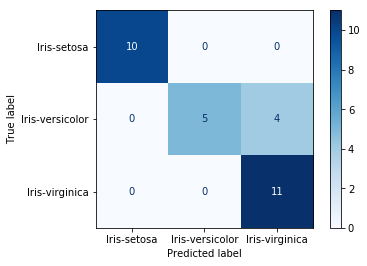

In [10]:
y_test_hat = svm_pipeline.predict(X_test)

print(classification_report(y_test, y_test_hat,))
print(plot_confusion_matrix(svm_pipeline, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

Berdasarkan hasil diatas dapat dilihat accuracy dan juga dapat dilihat perbedaan dari tiap jenis iris. pada label 0 tidak terdapat kesalahan, sedangkan pada label 1 dan 2 terdapat kesalahan pada precision dan recall. Accuracy yang didapat dari hasil diatas yaitu 87% 